# Week11

Up until this point in lecture we discussed how to model the conditional distribution of a random variable with a normal distribution---linear regression. 
Linear regression can be used to understand how a set of covariates $(x_{1},x_{2},\cdots,x_{p})$ relate linearly to a random variable $Y$. 
We assume that $Y$ is a normally distributed variable.
Because we assume $Y$ can be modeled as a normally distributed random variable we expect that our $Y$ data is some set of negative, positive decimal data (i.e. -2.12, 3.14, 78.2, etc).

But what if our $Y$ data is instead a set of $0$s and $1$s that represent the absence and presence of some phenomena? Our plan is to explore logistic regression.

The goal of logistic regression is to model a set of $Y$ data with binary responses (Yes/No), (Presence/Absence).

## Data setup

Suppose we have a dataset of $p$ covariates and a single target variable $y$.
Then our dataset can be represented as 

\begin{align}
\mathcal{D} = [  (x^{1}_{1},x^{2}_{1},\cdots,x^{p}_{1},y^{1}),(x^{1}_{2},x^{2}_{2},\cdots,x^{p}_{2},y^{2}), \cdots, (x^{1}_{N},x^{2}_{N},\cdots,x^{p}_{N},y^{N}) ]  
\end{align}

where $x_{a}^{b}$ corresponds to the $a$th covariate from the $b$th datapoint.
Note that our setup above is identical to our setup for multivairate linear regression (MLR). 

The difference between MLR and logistic regression (LR) is that in LR each $y_{i}$ is either the value 0 or 1. 

## A model for $Y$

Lets start to model $Y$ by first searching or a random variable that generates the value 0 or 1.
We know that a Bernoulli distributed random variable with parameter $\theta$ will generate the value 1 with probability $\theta$ and the value 0 with probability $1-\theta$. 

That is, if $Y$ is a Bernoulli distributed random variable then 

\begin{align}
    Y &\sim \text{Bern}(\theta) \\ 
    p(Y=1) &= \theta \\ 
    p(Y=0) &= 1 - \theta\\
    p(Y=y) &= \theta^{y}(1-\theta)^{1-y}
\end{align}

The expected value of $Y$ is $\mathbb{E}(Y) = \theta$ and the variance of $Y$ is $\mathbb{V}(Y) = \theta(1-\theta)$.

When we explore MLR, we started by assuming our $Y$ had a normal distriubution $\mathcal{N}(\mu,\sigma^{2})$ and then modified $\mu$ so that it was a function that depended on parameters $\beta$ and $x$ data.
We chose to modify $\mu$ because the expected value of $Y$ was $\mu$. 

Let us take the same approach with our $Y$ above and model the conditional distribtuion of $Y$ given parameters $\beta$ and $x$ data as 

\begin{align}
    Y_{i}|\beta_{0}, \beta_{1},x_{i} \sim \text{Bern}(\theta(x))\\
    \theta(x) = \beta_{0} + \beta_{1} x\\
\end{align}

But we have a problem. 
The parameter $\theta$ is constrained to be a value between 0 and 1, yet the quantity $\beta_{0} + \beta_{1} x$ can take any value from negative to positive infinity. 
We need a way to constrain our values for $\theta$ to be between 0 and 1. 

### The logistic function

One method to constrain $\theta$ to be between 0 and 1 is to use the logistic function. 
The logistic function $f$ is

\begin{align}
    f(x) = \frac{e^{x}}{1+e^{x}}
\end{align}

For $x$ values that approach positive infinity the logistic function approaches the value 1. 
For $x$ values that approach negative infinity the logistic function approaches the value 0.

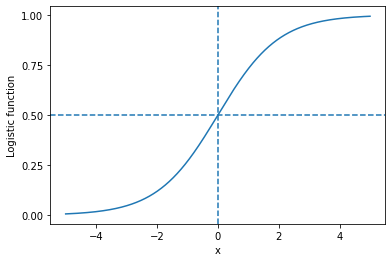

In [8]:
def logistic(x):
    import numpy as np
    e = np.exp(x)
    return e/(1+e)

fig,ax = plt.subplots()
domain = np.linspace(-5,5,10**3)

ax.plot(domain,logistic(domain))

ax.set_xlabel("x")
ax.set_ylabel("Logistic function")

ax.axvline(0,ls="--")
ax.axhline(0.5,ls="--")

ax.set_yticks([0,0.25,0.50,0.75,1.0])

plt.show()

Because logistic function maps values from negative infinity to positive infintiy to numbers between 0 and 1, we can use this function to give us valid $\theta$ values. 

\begin{align}
    Y_{i}|\beta_{0}, \beta_{1},x_{i} \sim \text{Bern}(\theta(x))\\
    \theta(x) = L(\beta_{0} + \beta_{1} x)\\
\end{align}

where $L$ is the logistic functon. In other words,

\begin{align}
    Y_{i}|\beta_{0}, \beta_{1},x_{i} \sim \text{Bern}(\theta(x))\\
    \theta(x) = \frac{e^{\beta_{0} + \beta_{1} x}}{1+e^{\beta_{0} + \beta_{1} x}}\\
\end{align}



## A way to write logistic regression that looks more familiar 

At times it can be convienant to rewrite our logistic regression model above to look more similar to the more familar multivariate linear regression. For multivariate linear regression, the expedcted value of our target variable was equal to $\beta_{0} + \beta_{1} x$. 

or logistic regression our expected value is 

\begin{align}
    \mathbb{E}(Y) = \frac{e^{\beta_{0} + \beta_{1} x}}{1+e^{\beta_{0} + \beta_{1} x}}
\end{align}

Let's rearrange the above equation to isolate $\beta_{0} + \beta_{1} x$. 

\begin{align}
    \theta = \mathbb{E}(Y) &= \frac{e^{\beta_{0} + \beta_{1} x}}{1+e^{\beta_{0} + \beta_{1} x}} \\ 
    1+e^{\beta_{0} + \beta_{1} x}(\theta) &= e^{\beta_{0} + \beta_{1} x} \\ 
    \theta + \theta e^{\beta_{0} + \beta_{1} x} &= e^{\beta_{0} + \beta_{1} x} \\ 
    \theta  &= e^{\beta_{0} + \beta_{1} x} - \theta e^{\beta_{0} + \beta_{1} x} \\ 
    \theta  &= e^{\beta_{0} + \beta_{1} x}(1-\theta) \\ 
    \frac{\theta}{1-\theta}  &= e^{\beta_{0} + \beta_{1} x} \\ 
    \log \left(\frac{\theta}{1-\theta}\right) &= \beta_{0} + \beta_{1} x
\end{align}

The ratio $\frac{\theta}{1-\theta}$ is called the **odds** and so the quantity  $\log \left(\frac{\theta}{1-\theta}\right)$ is called the **log odds**. 

## A 1-unit change in $X$

Just like in MLR, we can look at how 
